In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
Reward = np.zeros((2000,1000))
vareps = 0.05
for n in range(2000):
    A = np.zeros((10,1000)) # % Action register
    R = np.zeros((10,1000)) # % Reward register
    Q = np.zeros((10,1000)) # % Value register
    a = np.random.normal(0, 1, 10)
    # Inital
    f = random.randint(0,9)
    A[f,0] = 1
    R[f,0] = np.random.normal(a[f], 1, 1)
    
    # After Inital
    for t in range(1,1000):
        #Determine Action Value estimate using sample average method
        for i in range(10):
            if A[i,t-1] == 1:
                Q[i,t] = np.sum(R[i,0:t])/np.sum(A[i,0:t])
            else:
                Q[i,t] = Q[i,t-1]
                
        M = max(Q[:,t])
        a_s = []
        auxv = random.random()
        if auxv<1-vareps:
            for i in range(10):
                if Q[i,t] == M:
                    a_s.append(i)
                    
            if len(a_s) > 1:  # Multiple greedy actions
                r = random.randint(0,len(a_s)-1)
                k = a_s[r]
            else:   # A greedy action
                k = a_s[0]
        else:
            k = random.randint(0,9)
        
        A[k,t] = 1      # Action Register 
        R[k,t] = np.random.normal(a[k], 1, 1)   #Reward register
    Reward[n,:]= [sum([row[i] for row in R]) for i in range(0,len(R[0]))]

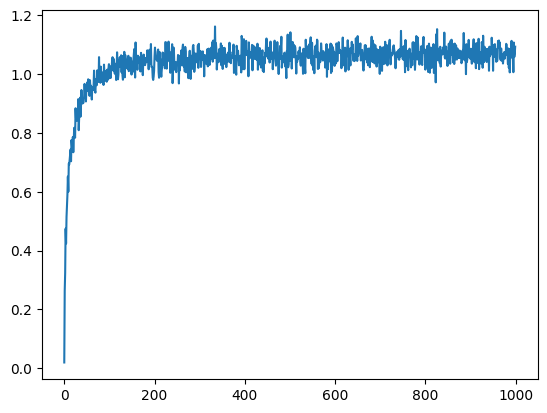

In [16]:
T = np.mean(Reward,axis=0)
plt.plot(T)

In [10]:
auxv = random.random()
auxv

0.6120702658051415